# Index

### This type of plots are applied on 2 dimensional data. For example, correalation and pivot table result. Columns and index ( rows) could be of any datatype( numerical or categorical ). But values would always be numbers. 

1) [Heatmap with correlation](#withcorr)

2) [Heatmap with pivot table](#withpivot)

3) [Cluster Map](#clustermap)

4) [Pair Grid](#grid)

5) [Facet Grid](#facet)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## <a id = withcorr> Heatmap with correlation </a>

here it includes only 2 numerical variables, then correlation is applied.

In [32]:
cor = tips.corr()
cor

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


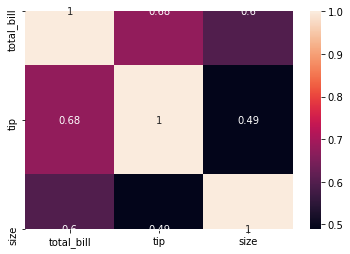

In [53]:
sns.heatmap(cor,annot=True)

## <a id = withpivot> Heatmap with pivot table </a>

here it includes 2 categorical variables and one nuerical.

In [28]:
import pandas as pd

In [30]:
pt = pd.pivot_table(tips,values='total_bill',columns='day',index='sex')
pt

day,Thur,Fri,Sat,Sun
sex,,,,
Male,18.714667,19.857000,20.802542,21.887241
Female,16.715312,14.145556,19.680357,19.872222


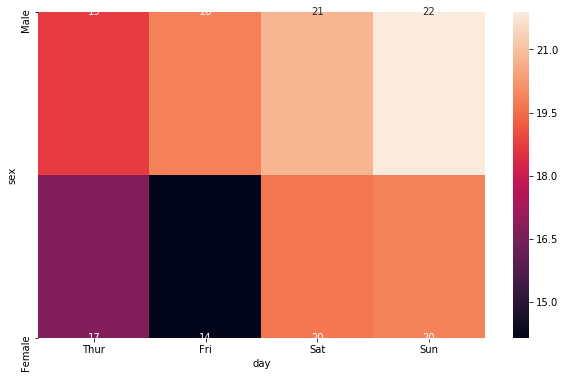

In [52]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(pt,annot=True)

In [55]:
#  pivot table on flights

pt2 = pd.pivot_table(flights,values='passengers',columns='month',index='year')
pt2

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


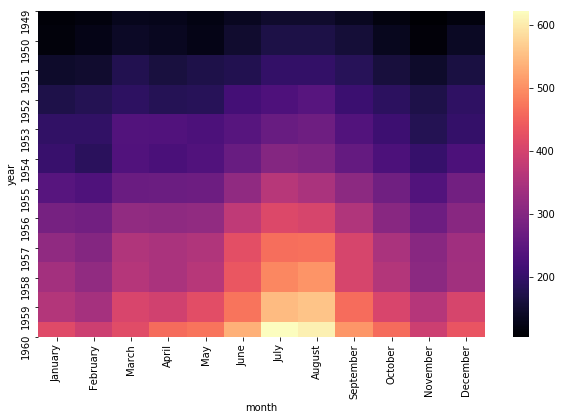

In [68]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(pt2,cmap='magma',annot=False)

## Linecolor and linewidth

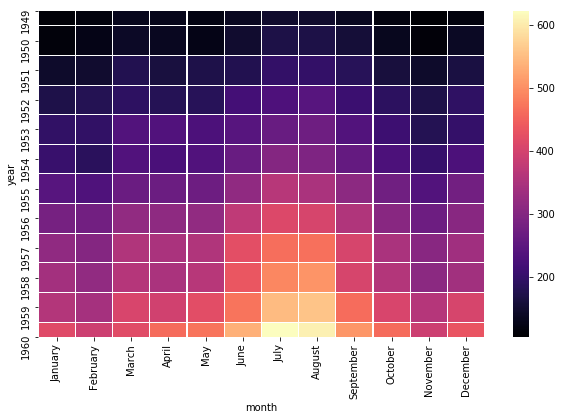

In [74]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(pt2,cmap='magma',annot=False,linecolor='white',linewidths=.01)

 
## <a id = clustermap> Cluster Map </a>

it is a cluster version of heatmap

it is very helpful to check the similarities between features

it will cluster all similar features toegther.

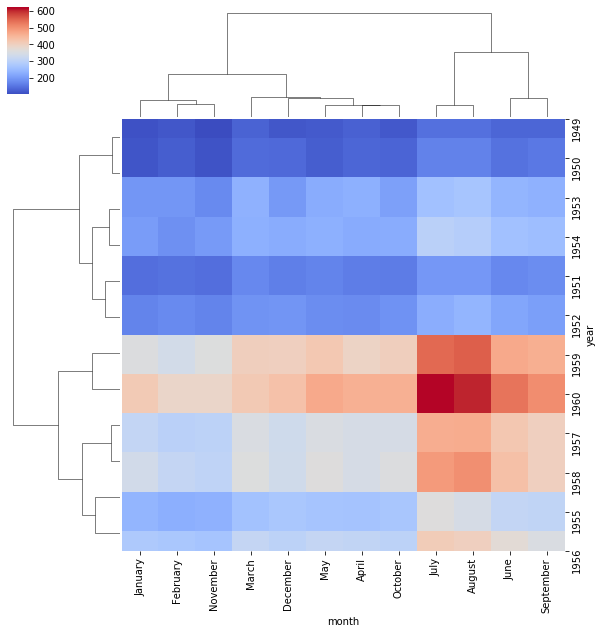

In [76]:
sns.clustermap(pt2,cmap= 'coolwarm')

# scale the graph( normalization or standardization)

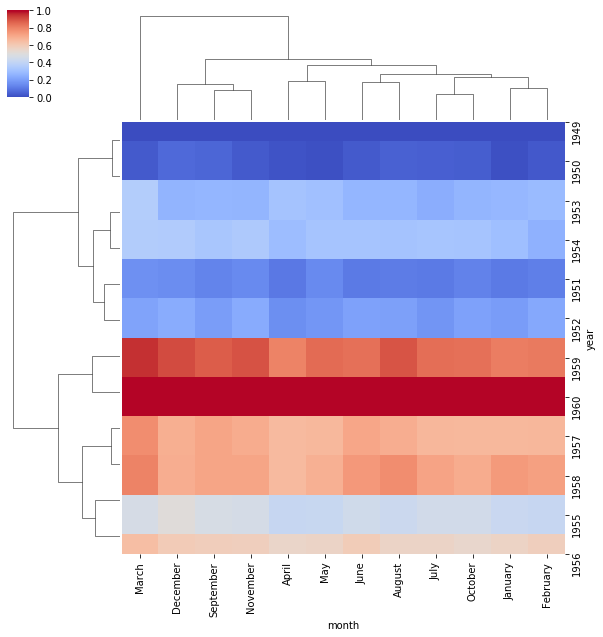

In [78]:
sns.clustermap(pt2,cmap= 'coolwarm', standard_scale= 1)

## <a id = grid> Pair Grid </a>

In [80]:
iris= sns.load_dataset('iris')

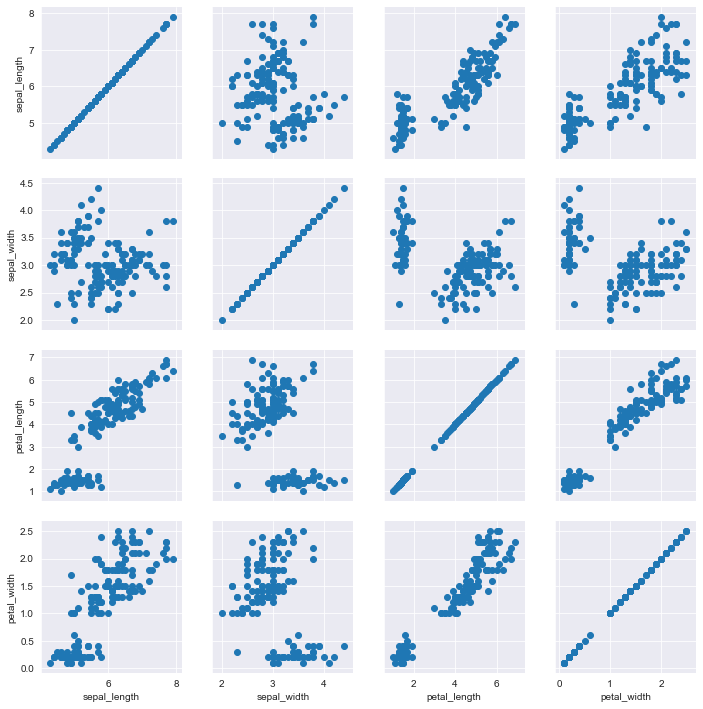

In [89]:
sns.set_style('darkgrid')
g = sns.PairGrid(iris)
g.map(plt.scatter)

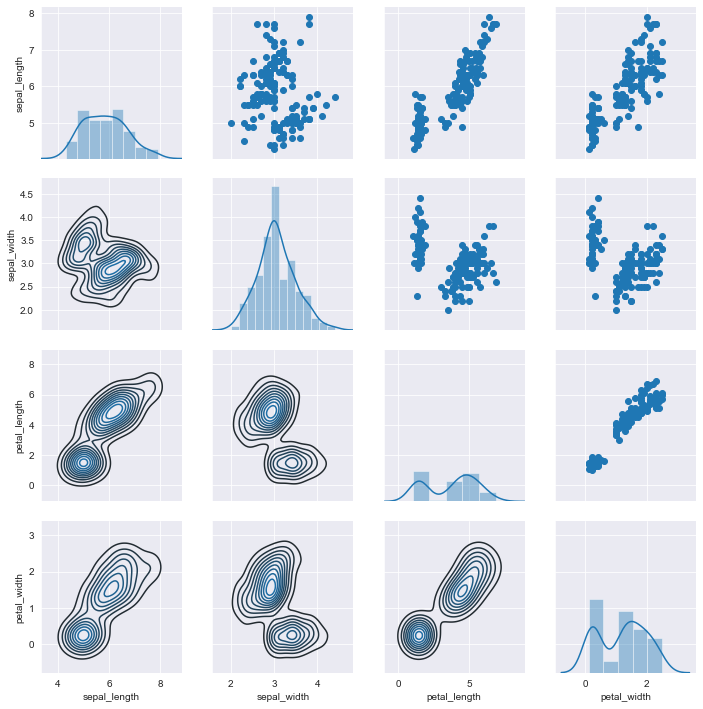

In [90]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## <a id = facet> Facet Grid </a>

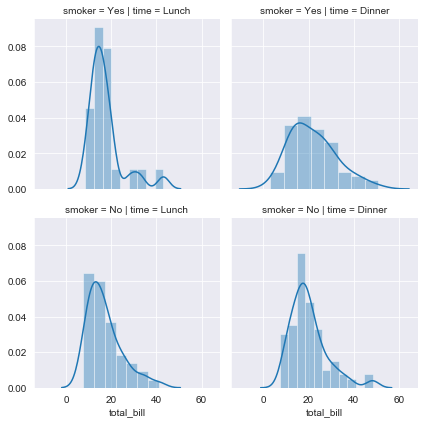

In [92]:
g   = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')

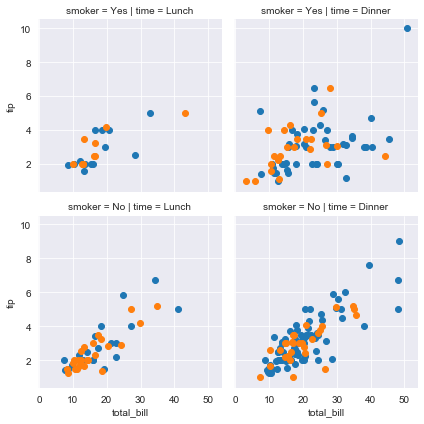

In [99]:
g   = sns.FacetGrid(data=tips,col='time',row='smoker',hue='sex')
g.map(plt.scatter,'total_bill','tip')

# hurray !! most of matrix plot are done.